<a href="https://colab.research.google.com/github/skander-kerkeni/Predict_if_it_s_photo_or_other/blob/data_preprocessing/Livrable1_Version0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/content/drive/MyDrive


In [ ]:
#cd /content/drive/MyDrive/
#!unrar x Dataset.rar

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Extracting  Projet Dataset/original_dataset/Text/text_05003.jpg           95%  OK 
Extracting  Projet Dataset/original_dataset/Text/text_05004.jpg           95%  OK 
Extracting  Projet Dataset/original_dataset/Text/text_05005.jpg           95%  OK 
Extracting  Projet Dataset/original_dataset/Text/text_05006.jpg           95%  OK 
Extracting  Projet Dataset/original_dataset/Text/text_05007.jpg           95%  OK 
Extracting  Projet Dataset/original_dataset/Text/text_05008.jpg           95%  OK 
Extracting  Projet Dataset/original_dataset/Text/text_05009.jpg           95%  OK 
Extracting  Projet Dataset/original_dataset/Text/text_05010.jpg           95%  OK 
Extracting  Projet Dataset/original_dataset/Text/text_05011.jpg           95%  OK 
Extracting  Projet Dataset/original_dataset/Text/text_05012.jpg           95%  OK 
Ex

In [ ]:
cd /content/drive/MyDrive/Projet Dataset/original_dataset

/content/drive/MyDrive/Projet Dataset/original_dataset


In [ ]:
ls

Painting/  Photo/  Schematics/  Sketch/  Text/


In [ ]:
batch_size = 32
img_height = 180
img_width = 180


In [ ]:
cd ..

/content/drive/MyDrive/Projet Dataset


80% des images pour l'apprentissage et 20% pour la validation

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
   directory="original_dataset",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 41406 files belonging to 5 classes.
Using 33125 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  directory="original_dataset",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 41406 files belonging to 5 classes.
Using 8281 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Painting', 'Photo', 'Schematics', 'Sketch', 'Text']


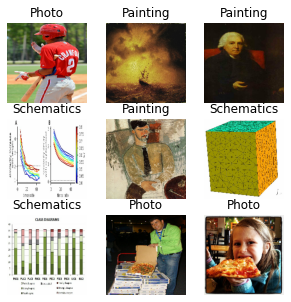

In [ ]:
plt.figure(figsize=(5, 5))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [ ]:
num_classes = 5

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
#train model
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)